In [1]:
import pandas as pd
import os
import librosa
import numpy as np

In [207]:
df =pd.read_csv("dataset_file_directory.csv")

In [134]:
df

,Filename,Participant,Label
0,200126_2142_00-13-04.06--00-13-04.324.wav,P01,dysregulation-sick
1,200126_2142_00-06-41.54--00-06-42.47.wav,P01,dysregulation-sick
2,200126_2142_00-11-35.94--00-11-37.08.wav,P01,dysregulation-sick
3,200126_2142_00-12-11.66--00-12-15.31.wav,P01,dysregulation-sick
4,200126_2142_00-00-24.55--00-00-24.95.wav,P01,dysregulation-sick
...,...,...,...
7072,210318_1436_00-00-00.0--00-00-01.05.wav,P16,delighted
7073,210201_1427_00-00-07.09--00-00-07.73.wav,P16,delighted
7074,210112_1705_00-01-33.50--00-01-34.27c.wav,P16,delighted
7075,210112_1705_00-02-15.45--00-02-16.20c.wav,P16,delighted


In [ ]:
p1_dataset =df[df['Participant'] == 'P01'] #select single person data
p2_dataset =df[df['Participant']== 'P02']
p3_dataset =df[df['Participant']== 'P03']
p5_dataset =df[df['Participant']== 'P05']
p6_dataset =df[df['Participant']== 'P06']
p8_dataset =df[df['Participant']== 'P08']
p11_dataset =df[df['Participant']== 'P11']
p16_dataset =df[df['Participant']== 'P16']




In [337]:
num_classes = p16_dataset['Label'].nunique()
class_counts = p16_dataset['Label'].value_counts()

class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Count']
print(class_counts_df)
print("no of classes:",num_classes)

        Class  Count
0    selftalk    354
1  frustrated    162
2   delighted    139
3      social     59
no of classes: 4


In [323]:
#remove unwanted classes
p8_dataset =p8_dataset[~p8_dataset['Label'].isin([ 'protest','more','tablet','dysregulated'])]
p11_dataset =p11_dataset[~p11_dataset['Label'].isin(['greeting'])]
p16_dataset =p16_dataset[~p16_dataset['Label'].isin(['dysregulated','no','request'])]



In [325]:
from sklearn.utils import shuffle
p16_datasets = shuffle(p16_dataset)


In [359]:
p16_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 6628 to 6701
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Filename     714 non-null    object
 1   Participant  714 non-null    object
 2   Label        714 non-null    object
dtypes: object(3)
memory usage: 22.3+ KB


In [327]:
#************note skipping Audio files that don't have correspondent audio file will remove this when data is not available******************


# Specify the directory where your Python script is located
script_dir = r"C:\Users\pawan\Desktop\mv\downloaddataset"
# Define the relative path to the WAV files directory
wav_dir = os.path.join(script_dir, "downloaded_wav_files")

# Initialize lists to store features and labels
features1 = []
labels1 = []
null_file=0
for index, row in p16_datasets.iterrows():
    filename = row['Filename']
    participant = row['Participant']
    label = row['Label']
    wav_file_path = os.path.join(wav_dir, filename)

    # Check if the audio file exists before attempting to load it
    if os.path.exists(wav_file_path):
        try:
            # Load the WAV file using librosa
            audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

            # Perform feature extraction (e.g., MFCCs)
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
            chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
            spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
            # Calculate the mean of MFCCs along each feature dimension
#             rms = librosa.feature.rms(y=audio_data)
#             rms_mean = np.mean(rms)

          
            mfccs_mean = np.mean(mfccs, axis=1)
            chroma_mean = np.mean(chroma, axis=1)
            spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
              # Concatenate RMS and MFCC features
#             combined_features = np.concatenate((np.array([rms_mean]), mfccs_mean,chroma_mean,spectral_contrast_mean), axis=0)

            #combined features
            combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean))
            # Append the extracted features and label to the lists
            features1.append(combined_feature_vector)
            labels1.append(label)

        except Exception as e:
            print(f"Error processing {wav_file_path}: {str(e)}")
    else:
        null_file +=1
        print(f"Audio file not found: {wav_file_path}")
print("Related audio file unfound count:",null_file)
# Now, features1 and labels1 should only contain data for audio files that exist


Related audio file unfound count: 0


In [328]:
X = np.array(features1)
y = np.array(labels1)

In [329]:
print(labels1)

['selftalk', 'social', 'selftalk', 'frustrated', 'selftalk', 'selftalk', 'selftalk', 'frustrated', 'delighted', 'delighted', 'selftalk', 'frustrated', 'delighted', 'selftalk', 'selftalk', 'selftalk', 'frustrated', 'delighted', 'delighted', 'selftalk', 'selftalk', 'selftalk', 'selftalk', 'delighted', 'delighted', 'social', 'frustrated', 'delighted', 'selftalk', 'delighted', 'selftalk', 'selftalk', 'delighted', 'delighted', 'frustrated', 'social', 'selftalk', 'frustrated', 'selftalk', 'selftalk', 'selftalk', 'social', 'social', 'selftalk', 'selftalk', 'selftalk', 'frustrated', 'frustrated', 'frustrated', 'delighted', 'selftalk', 'delighted', 'selftalk', 'delighted', 'selftalk', 'selftalk', 'frustrated', 'delighted', 'selftalk', 'delighted', 'selftalk', 'selftalk', 'selftalk', 'delighted', 'selftalk', 'selftalk', 'frustrated', 'delighted', 'selftalk', 'frustrated', 'selftalk', 'frustrated', 'selftalk', 'frustrated', 'selftalk', 'frustrated', 'selftalk', 'delighted', 'delighted', 'social',

In [330]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,test_size=0.25, random_state=42)


In [331]:
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

# Compare the unique classes in both sets
if np.array_equal(unique_classes_train, unique_classes_test):
    print("All classes are present in both the training and test sets.")
else:
    print("Classes are not consistent between training and test sets.")


All classes are present in both the training and test sets.


In [332]:
X_train.shape

(535, 39)

In [333]:
print(y)

['selftalk' 'social' 'selftalk' 'frustrated' 'selftalk' 'selftalk'
 'selftalk' 'frustrated' 'delighted' 'delighted' 'selftalk' 'frustrated'
 'delighted' 'selftalk' 'selftalk' 'selftalk' 'frustrated' 'delighted'
 'delighted' 'selftalk' 'selftalk' 'selftalk' 'selftalk' 'delighted'
 'delighted' 'social' 'frustrated' 'delighted' 'selftalk' 'delighted'
 'selftalk' 'selftalk' 'delighted' 'delighted' 'frustrated' 'social'
 'selftalk' 'frustrated' 'selftalk' 'selftalk' 'selftalk' 'social'
 'social' 'selftalk' 'selftalk' 'selftalk' 'frustrated' 'frustrated'
 'frustrated' 'delighted' 'selftalk' 'delighted' 'selftalk' 'delighted'
 'selftalk' 'selftalk' 'frustrated' 'delighted' 'selftalk' 'delighted'
 'selftalk' 'selftalk' 'selftalk' 'delighted' 'selftalk' 'selftalk'
 'frustrated' 'delighted' 'selftalk' 'frustrated' 'selftalk' 'frustrated'
 'selftalk' 'frustrated' 'selftalk' 'frustrated' 'selftalk' 'delighted'
 'delighted' 'social' 'delighted' 'frustrated' 'social' 'selftalk'
 'frustrated' 'frustr

In [338]:

#define cnn model
import tensorflow as tf
from tensorflow.keras import layers, models


# # Define the CNN model
# model = models.Sequential([
#     layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
#     layers.Conv1D(64, 3, activation='relu'),
#     layers.MaxPooling1D(2),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')  # Two output classes
# ])

model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(6, activation='softmax') 
])

In [339]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [340]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, 
                   validation_split=0.2, 
                    batch_size=45)

Epoch 1/100
10/10 [==============================] - 1s 54ms/step - loss: 3.6122 - accuracy: 0.3505 - val_loss: 1.2274 - val_accuracy: 0.5514
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 1.5032 - accuracy: 0.4089 - val_loss: 1.2080 - val_accuracy: 0.5140
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 1.4131 - accuracy: 0.4393 - val_loss: 1.1804 - val_accuracy: 0.5794
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 1.2608 - accuracy: 0.5140 - val_loss: 1.0466 - val_accuracy: 0.6168
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 1.1735 - accuracy: 0.5491 - val_loss: 1.0099 - val_accuracy: 0.6916
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 1.0820 - accuracy: 0.5841 - val_loss: 0.9368 - val_accuracy: 0.6355
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 1.0540 - accuracy: 0.5981 - val_loss: 0.8837 - val_accuracy: 0.6636
Epoch 

In [341]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

6/6 [==============================] - 0s 5ms/step - loss: 2.1996 - accuracy: 0.7374
Test accuracy: 0.7374301552772522


In [342]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [343]:
y_pred

array([[5.0577205e-01, 4.8981503e-01, 3.8475473e-03, 5.0206226e-04,
        2.9120007e-05, 3.4227272e-05],
       [9.9659586e-01, 1.7244553e-05, 3.3867182e-03, 6.0745499e-08,
        9.0761093e-10, 1.1194622e-08],
       [5.7057782e-08, 2.8602474e-09, 9.9999982e-01, 7.1619682e-10,
        6.0547408e-16, 6.7270184e-14],
       ...,
       [6.2154017e-05, 9.1487736e-06, 9.9842370e-01, 1.5050550e-03,
        4.1113157e-09, 3.8663824e-08],
       [4.0783198e-05, 1.0525250e-02, 9.8355073e-01, 5.8815996e-03,
        8.8023000e-07, 6.0602713e-07],
       [5.1266844e-03, 9.9474406e-01, 1.2512966e-04, 3.7358702e-06,
        1.8654374e-07, 9.0366989e-08]], dtype=float32)

In [344]:
class_labels = p8_dataset['Label'].unique()

In [345]:
y_pred_labels = np.argmax(y_pred, axis=1)


In [346]:
# Check if all 10 classes are present in the true labels and predicted labels
true_classes = np.unique(y_test)
predicted_classes = np.unique(y_pred_labels)

missing_classes = set(true_classes) ^ set(predicted_classes)

if missing_classes:
    print(f"Missing classes: {missing_classes}")
else:
    print("All classes are present.")

# Check if the class labels are correctly mapped
if len(class_labels) != num_classes:
    print("Number of class labels does not match the number of classes.")
else:
    print("Class labels are correctly mapped.")

# Check label encoding consistency
if len(true_classes) != len(predicted_classes):
    print("Label encoding is inconsistent between true and predicted labels.")
else:
    print("Label encoding is consistent.")

# If any issues are found, investigate and correct the data accordingly.


All classes are present.
Number of class labels does not match the number of classes.
Label encoding is consistent.


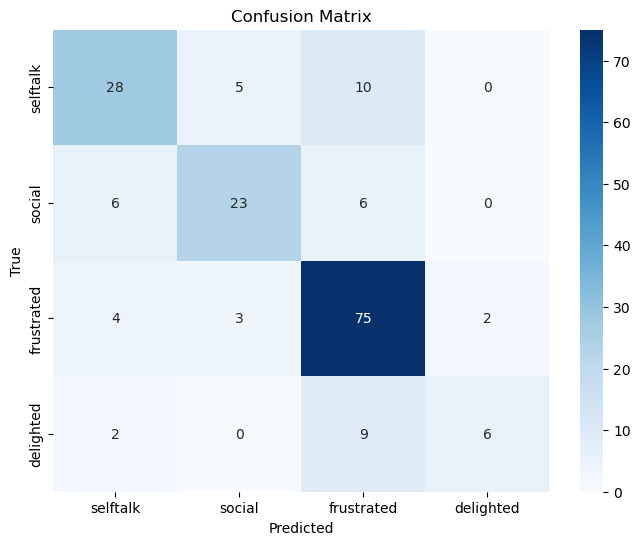

In [347]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Extract unique class labels from the 'Label' column
class_labels = p16_datasets['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)


# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


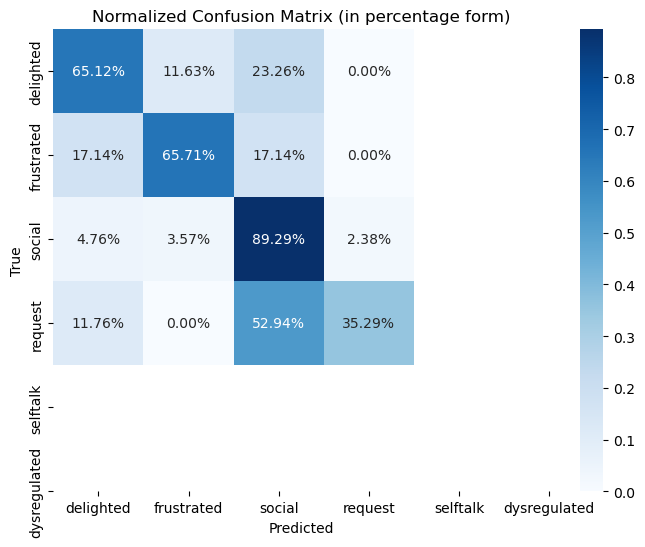

In [348]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrix as 'confusion'
# The matrix is expected to be in the format returned by the confusion_matrix function

# Calculate the sum of true positives, true negatives, false positives, and false negatives for each class
class_sums = np.sum(confusion, axis=1)

# Normalize the confusion matrix by dividing each entry by the respective class sum
normalized_confusion = confusion / class_sums[:, np.newaxis]

# Extract unique class labels from the 'Label' column
class_labels = p11_datasets['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap to visualize the normalized confusion matrix (in percentage form)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix (in percentage form)')
plt.show()


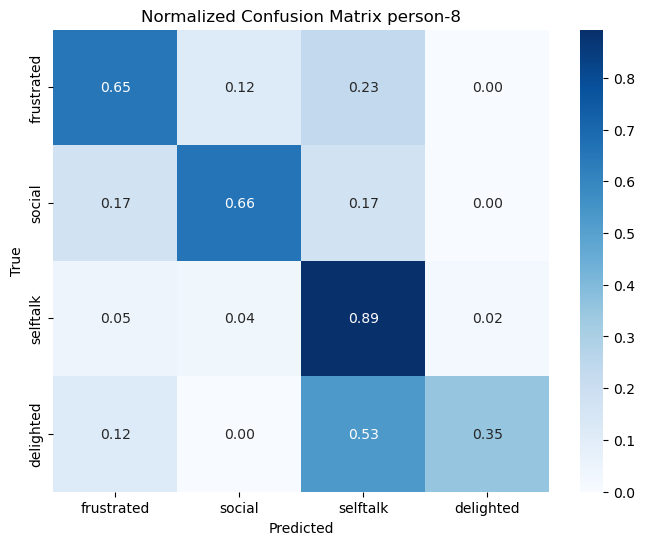

In [349]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrix as 'confusion'
# The matrix is expected to be in the format returned by the confusion_matrix function

# Calculate the sum of true positives, true negatives, false positives, and false negatives for each class
class_sums = np.sum(confusion, axis=1)

# Normalize the confusion matrix by dividing each entry by the respective class sum
normalized_confusion = confusion / class_sums[:, np.newaxis]

# Extract unique class labels from the 'Label' column
class_labels = p16_dataset['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap to visualize the normalized confusion matrix (without percentages)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix person-8')
plt.show()


In [268]:

#hyperparameter tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch


In [351]:
#hyper parameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    
    # Tune the number of filters for Conv1D
    hp_filters = hp.Int('filters', min_value=32, max_value=128, step=32)
    model.add(layers.Conv1D(hp_filters, 3, activation='relu'))
    
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    
    # Tune the number of units in the Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(layers.Dense(hp_units, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Choose the metric to optimize
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_tuning_dir',  # Directory to store results
    project_name='audio_classification'
)
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             batch_size=64)
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model(best_hp)


Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.7943925261497498

Best val_accuracy So Far: 0.8130841255187988
Total elapsed time: 00h 01m 03s


In [355]:
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=42)


Epoch 1/20
11/11 [==============================] - 0s 20ms/step - loss: 0.5857 - accuracy: 0.7710 - val_loss: 1.0705 - val_accuracy: 0.7103
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 0.5674 - accuracy: 0.7687 - val_loss: 0.9738 - val_accuracy: 0.7290
Epoch 3/20
11/11 [==============================] - 0s 9ms/step - loss: 0.5224 - accuracy: 0.8061 - val_loss: 0.9776 - val_accuracy: 0.7383
Epoch 4/20
11/11 [==============================] - 0s 9ms/step - loss: 0.4526 - accuracy: 0.8224 - val_loss: 0.8814 - val_accuracy: 0.7570
Epoch 5/20
11/11 [==============================] - 0s 9ms/step - loss: 0.4379 - accuracy: 0.8388 - val_loss: 0.8872 - val_accuracy: 0.7477
Epoch 6/20
11/11 [==============================] - 0s 9ms/step - loss: 0.3938 - accuracy: 0.8388 - val_loss: 0.9422 - val_accuracy: 0.7477
Epoch 7/20
11/11 [==============================] - 0s 9ms/step - loss: 0.4057 - accuracy: 0.8528 - val_loss: 0.9642 - val_accuracy: 0.7103
Epoch 8/20
11/11 [=

In [356]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


6/6 [==============================] - 0s 6ms/step - loss: 1.0127 - accuracy: 0.7263
Test accuracy: 0.7262569665908813


In [357]:
# Import necessary libraries
import librosa
import numpy as np

# Define a function to preprocess and predict a single audio file
def predict_audio_file(audio_file_path, model, label_encoder):
    try:
        # Load the audio file using librosa
        audio_data, sample_rate = librosa.load(audio_file_path, sr=None)
        
        # Perform feature extraction (e.g., MFCCs)
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
        
        # Calculate the mean of MFCCs along each feature dimension
        mfccs_mean = np.mean(mfccs, axis=1)
        chroma_mean = np.mean(chroma, axis=1)
        spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
        
        # Concatenate the features into a feature vector
        combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean))
        
        # Make a prediction using the trained model
        predicted_label = model.predict(np.expand_dims(combined_feature_vector, axis=0))
        
        # Decode the predicted label using the label encoder
        predicted_label = label_encoder.inverse_transform([np.argmax(predicted_label)])
        
        return predicted_label[0]
    
    except Exception as e:
        print(f"Error processing {audio_file_path}: {str(e)}")
        return None

# Example usage:
real_audio_file_path = r"C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\200527_2220_00-05-00.07--00-05-00.28c.wav"  # Replace with the path to your real audio file
predicted_label = predict_audio_file(real_audio_file_path, model, label_encoder)

if predicted_label:
    print(f"Predicted label for {real_audio_file_path}: {predicted_label}")
else:
    print("Prediction failed.")


1/1 [==============================] - 0s 71ms/step
Predicted label for C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\200527_2220_00-05-00.07--00-05-00.28c.wav: frustrated


In [31]:
print(X_test)

[[-255.47180176  155.03268433  -56.9940834  ...   20.10864969
    24.13335547   38.31744787]
 [-256.90475464  235.0158844   -35.71337891 ...   15.9880769
    18.39287312   35.39542161]
 [-270.55050659  151.08876038  -58.21879578 ...   15.18162665
    19.80441792   39.24672991]
 ...
 [-238.45690918  182.57872009  -60.37998199 ...   16.18859452
    18.80407378   37.00130115]
 [-229.24040222  217.42886353  -50.63272095 ...   18.68636619
    24.21351502   40.07831987]
 [-282.07345581  144.93917847  -21.43672943 ...   16.04088439
    17.96710173   36.59973347]]


In [367]:
def extract_audiofeatures(dataset, features_list, labels_list):
    null_file = 0
    
    for index, row in dataset.iterrows():
        filename = row['Filename']
        participant = row['Participant']
        label = row['Label']
        wav_file_path = os.path.join(wav_dir, filename)

        # Check if the audio file exists before attempting to load it
        if os.path.exists(wav_file_path):
            try:
                # Load the WAV file using librosa
                audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

                # Perform feature extraction (e.g., MFCCs)
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
                chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
                spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)

                mfccs_mean = np.mean(mfccs, axis=1)
                chroma_mean = np.mean(chroma, axis=1)
                spectral_contrast_mean = np.mean(spectral_contrast, axis=1)

                # Combine the extracted features into a single vector
                combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean))

                # Append the extracted features and label to the lists
                features_list.append(combined_feature_vector)
                labels_list.append(label)

            except Exception as e:
                print(f"Error processing {wav_file_path}: {str(e)}")
        else:
            null_file += 1
            print(f"Audio file not found: {wav_file_path}")

    print("Related audio files not found count:", null_file)

    return null_file

# Initialize lists to store features and labels


# Now, features1 and labels1 should contain the extracted features and labels


In [369]:
features1 = []
labels1 = []

extract_audiofeatures(p1_datasets,features1,labels1)


NameError: name 'p1_datasets' is not defined